In [2]:
#-*- coding: utf-8 -*-
import pandas as pd
import pandas_datareader.data as web
import datetime
import fix_yahoo_finance

def download_stock_data(file_name, company_code, year1, month1, date1, year2, month2, date2):
    start = datetime.datetime(year1, month1, date1)
    end = datetime.datetime(year2, month2, date2)
#     df = web.DataReader('%s.KS' % (company_code), 'yahoo', start, end)
    df = web.get_data_yahoo('%s.KS' % (company_code), start, end)
    
    df.to_pickle(file_name)
    
    return df

def load_stock_data(file_name):
    df = pd.read_pickle(file_name)
    return df

download_stock_data('hanmi.data', '128940', 2015,1,1,2015,11,30)

df_samsung = load_stock_data('samsung.data')
df_hanmi = load_stock_data('hanmi.data')
print(df_samsung['Close'].cov(df_hanmi['Close']))

[                       0%                       ]-6751259329.63


In [3]:
print(df_samsung['Close'].corr(df_hanmi['Close']))

-0.36348397826


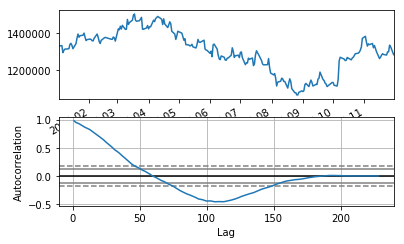

In [5]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix, autocorrelation_plot

fig, axs = plt.subplots(2, 1)
df_samsung['Close'].plot(ax=axs[0])
autocorrelation_plot(df_samsung['Close'], ax=axs[1])
plt.show()

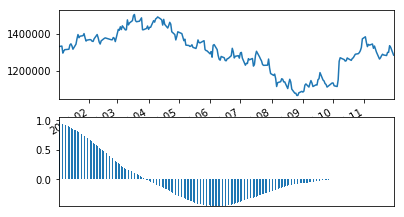

In [9]:
import numpy as np
from pandas.compat import lmap

def get_autocorrelation_dataframe(series):
    def r(h):
        return ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
    
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)
    x = np.arange(n) + 1
    y = lmap(r, x)
    df = pd.DataFrame(y, index = x)
    return df

df_samsung = load_stock_data('samsung.data')
df_samsung_corr = get_autocorrelation_dataframe(df_samsung['Close'])

fig, axs = plt.subplots(2, 1)
axs[1].xaxis.set_visible(False)

df_samsung['Close'].plot(ax=axs[0])
df_samsung_corr[0].plot(kind='bar', ax=axs[1])

plt.show()